AIDI 1002 - PROFESSOR SAJEEVA SALGODOE.

KINTU DECLAN TREVOR - 100944330.

# Fit a Decision Tree Model using Scikit-Learn for wine dataset

The wine dataset is one of the datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

## Q1. Build a Decision Tree Classifier model with max_depth = 5, random_state=100 for wine dataset

In [5]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
# Load the dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.head())

#replace this with the actual names
target = np.unique(data.target)
target_names = np.unique(data.target_names)
targets = dict(zip(target, target_names))
df['target'] = df['target'].replace(targets)

# Extract Dataset and define variables and split the dataset
x = df.drop(columns="target")
y = df["target"]
feature_names = x.columns
labels = y.unique()
X_train, test_x, y_train, test_lab = train_test_split(x, y, test_size = 0.4, random_state = 100)

# Fit the algorithm and train the data
clf = DecisionTreeClassifier(max_depth =5, random_state = 100)
clf.fit(X_train, y_train)


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

DecisionTreeClassifier(max_depth=5, random_state=100)

## Q2. Visualize the constructed Decision Trees using Matplotlib

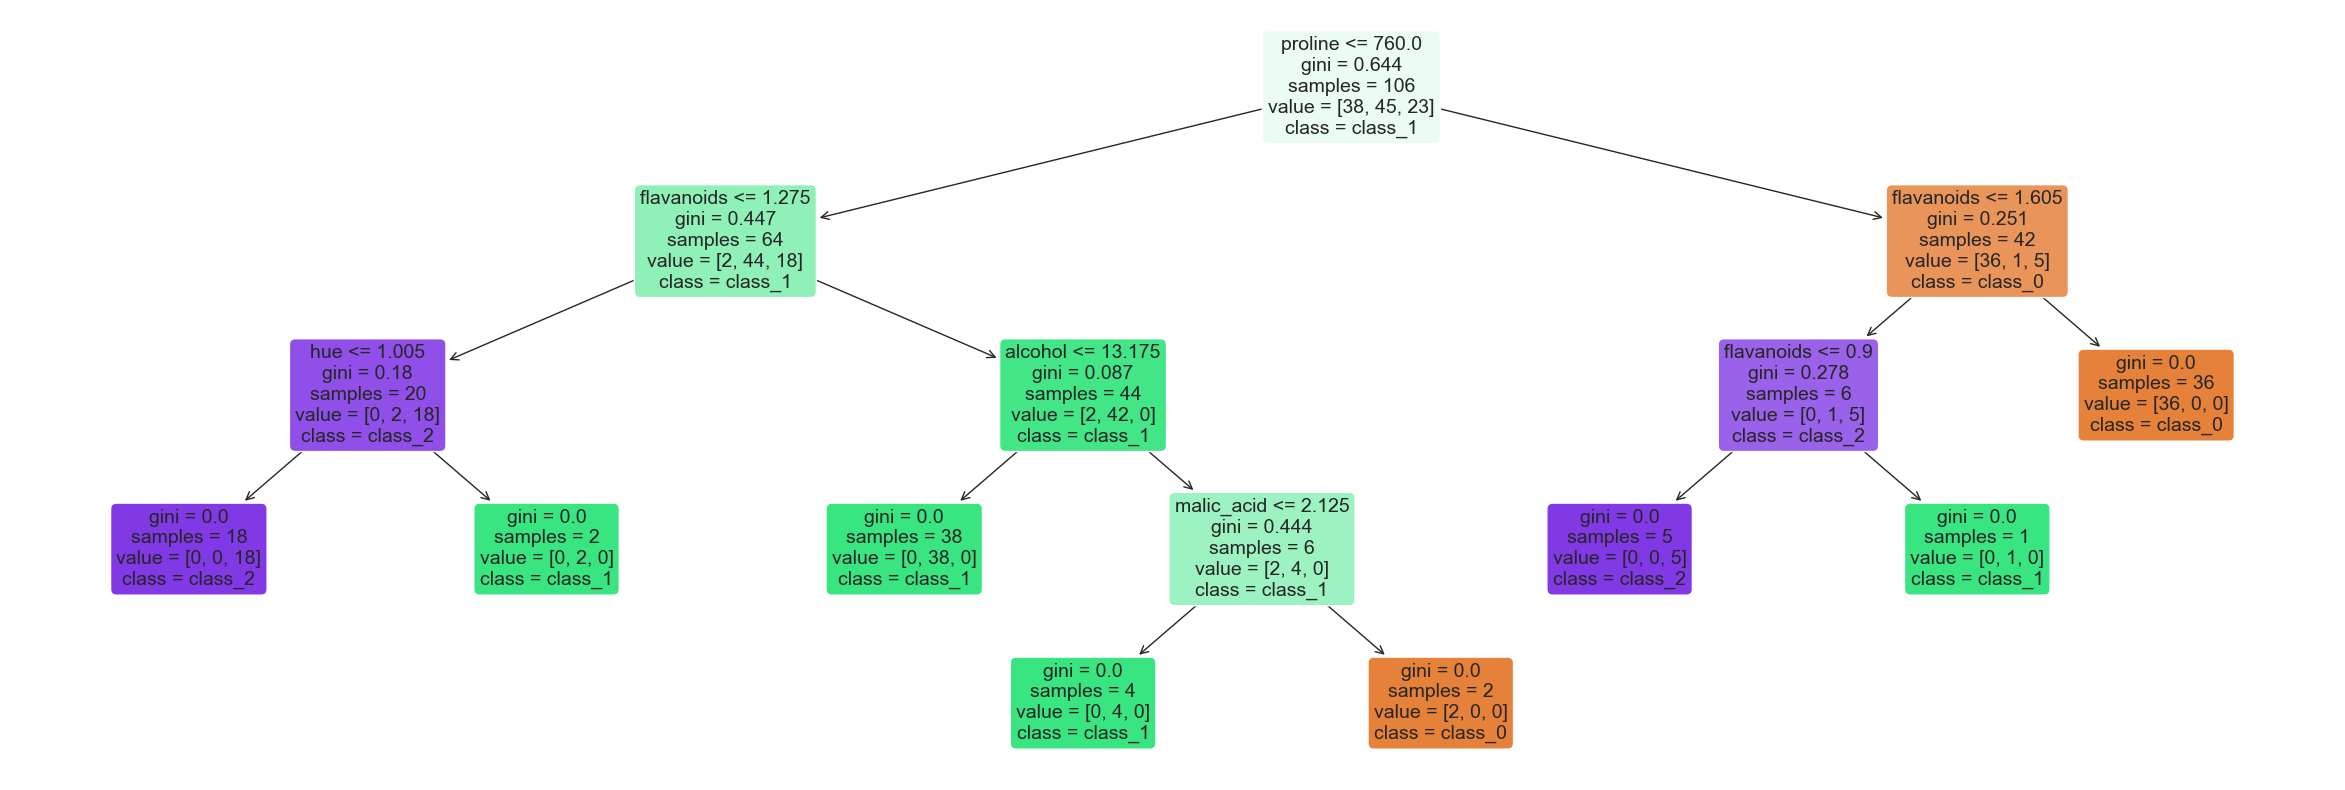

In [7]:
# Plot the results as a Decision tree
plt.figure(figsize=(30,10))
tree.plot_tree(clf, feature_names=feature_names, class_names=labels, rounded=True, filled=True, fontsize=14)
plt.show()


## Q3. Report the Confusion Matrix of the constructed Decison Tree

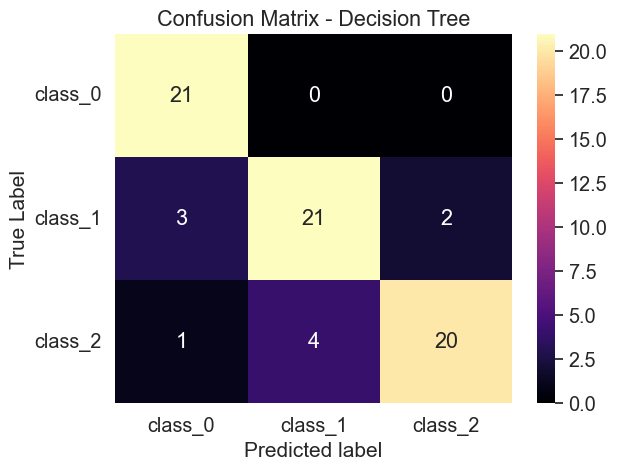

<Figure size 1000x700 with 0 Axes>

In [8]:
# Predict class from test values
test_pred_decision_tree = clf.predict(test_x)

# Calculate the confusion matrix and plot a graph describing the confusion matrix of the decision tree
confusion_matrix = metrics.confusion_matrix(test_lab, test_pred_decision_tree)
matrix_df = pd.DataFrame(confusion_matrix)
ax = plt.axes()
sns.set(font_scale=1.3)
plt.figure(figsize=(10,7))
sns.heatmap(matrix_df, annot=True, fmt="g", ax=ax, cmap="magma")
ax.set_title('Confusion Matrix - Decision Tree')
ax.set_xlabel("Predicted label", fontsize =15)
ax.set_xticklabels(['']+labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(list(labels), rotation = 0)
plt.show()
